# Alfven ratio in astroGK linear runs

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

%matplotlib inline
import matplotlib as mpl

fs = 20
mpl.rcParams['font.size'] = fs-2
mpl.rcParams['axes.labelsize'] = fs
mpl.rcParams['axes.titlesize'] = fs
mpl.rcParams['xtick.labelsize'] = fs
mpl.rcParams['ytick.labelsize'] = fs
mpl.rcParams['legend.fontsize'] = fs-2

# slow mode import data

In [25]:
file_dir = '/Volumes/yuguang_sd/data/agk/lin_response/ra_slow_upar_160929/'
heat = []
n = 12 # number of runs
for i in range(-2, n):
    file = file_dir + 'lin_upar_{0}'.format(i+1) + '.heat'
    heat.append(np.loadtxt(file))

In [26]:
t, Eb, Eup = [], [], []
for i in range(n+2):
    t.append(heat[i][:, 0])
    Eb.append(heat[i][:, 2] + heat[i][:, 3])
    Eup.append(np.sum(heat[i][:, [26, 28]], axis=1))

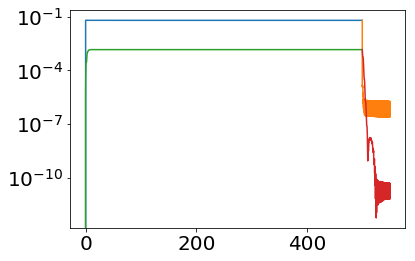

In [27]:
i = 0
plt.plot(t[i], Eb[i])
plt.plot(t[i+1], Eb[i+1])
plt.plot(t[i], Eup[i])
plt.plot(t[i+1], Eup[i+1])
plt.yscale('log')
# plt.xlim([45, 60])

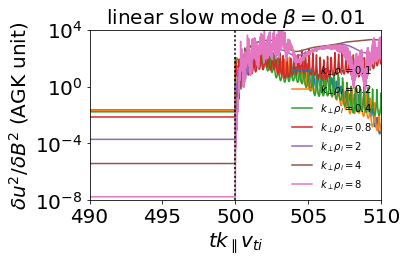

In [28]:
mask = np.where(Eb[0] > 0)
kperps_slow = [.1, .2, .4, .8, 2., 4., 8.]
ras_slow = []
for i in range(0, n+2, 2):
    ti, tiDecay = t[i][mask], t[i+1]
    ra, raDecay = Eup[i][mask]/Eb[i][mask], Eup[i+1]/Eb[i+1] 
    ras_slow.append(np.mean(ra[-10:]))
    plt.plot(np.append(ti, tiDecay), np.append(ra, raDecay), label=r'$k_\perp \rho_i = {0:.2g}$'.format(kperps_slow[i//2]))
plt.yscale('log')
plt.xlabel(r'$tk_\parallel v_{ti}$')
plt.ylabel(r'$\delta u^2/\delta B^2$ (AGK unit)')
plt.xlim([490, 510])
plt.axvline(500, linestyle='dotted', color='k')
plt.legend(loc='lower right', frameon=False, fontsize=10)
plt.ylim([1e-8, 1e4])
plt.title(r'linear slow mode $\beta=0.01$')
plt.tight_layout()
# plt.savefig('../figures/lin_agk_slow_ra.png')

## Import data

In [7]:
file_dir = '/Volumes/yuguang_sd/data/agk/lin_response/ra_alfven_upar_160929/'
# file_dir = '/Volumes/yuguang_sd/data/agk/lin_response/lin_slow_teti_100/'
heat = []
n = 12 # number of runs
# n = 2
for i in range(-2, n):
    file = file_dir + 'lin_upar_{0}'.format(i+1) + '.heat'
    heat.append(np.loadtxt(file))

In [8]:
t, Eb, Eup = [], [], []
for i in range(n+2):
    t.append(heat[i][:, 0])
    Eb.append(heat[i][:, 2] + heat[i][:, 3])
#     Eup.append(heat[i][:, 38] + heat[i][:, 40])
    Eup.append(np.sum(heat[i][:, [26, 28]], axis=1))
#     Eup.append(heat[i][:, 48] + heat[i][:, 50])

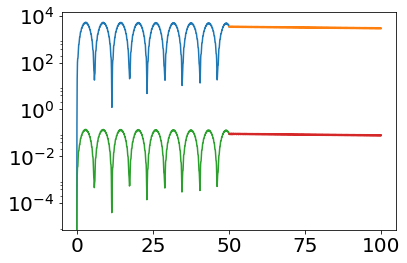

In [9]:
i = 0
plt.plot(t[i], Eb[i])
plt.plot(t[i+1], Eb[i+1])
plt.plot(t[i], Eup[i])
plt.plot(t[i+1], Eup[i+1])
plt.yscale('log')
# plt.xlim([45, 60])

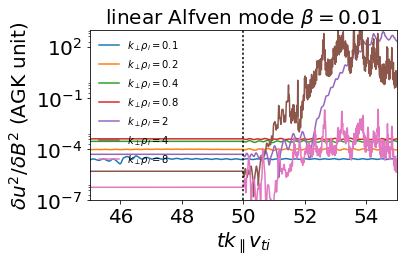

In [23]:
mask = np.where(Eb[0] > 0)
kperps_alfven = [.1, .2, .4, .8, 2., 4., 8.]
ras_alfven = []
for i in range(0, 14, 2):
    ti, tiDecay = t[i][mask], t[i+1]
    ra, raDecay = Eup[i][mask]/Eb[i][mask], Eup[i+1]/Eb[i+1] 
    ras_alfven.append(np.mean(ra[-10:]))
    plt.plot(np.append(ti, tiDecay), np.append(ra, raDecay), label=r'$k_\perp \rho_i = {0:.2g}$'.format(kperps_alfven[i//2]))
plt.yscale('log')
plt.xlabel(r'$tk_\parallel v_{ti}$')
plt.ylabel(r'$\delta u^2/\delta B^2$ (AGK unit)')
plt.xlim([45, 55])
plt.axvline(50, linestyle='dotted', color='k')
plt.legend(loc='best', frameon=False, fontsize=10)
plt.ylim([1e-7, 1e3])
plt.title(r'linear Alfven mode $\beta=0.01$')
plt.tight_layout()
# plt.savefig('../figures/lin_agk_alfven_ra.png')

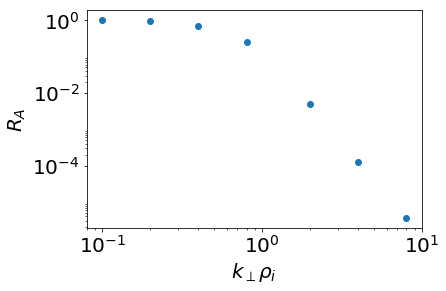

In [11]:
beta = 0.01

plt.plot(kperps_alfven, 4 * np.array(ras_alfven)/np.array(kperps_alfven)**2 / beta, 'o')
plt.ylim()
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$R_A$')
plt.xlabel(r'$k_\perp\rho_i$')

# Alfven ratio from Kris

In [12]:
krisAlfvenFile="/Users/Tong/Dropbox/CompressiveTurbulence/src_input/matlab_script/data/beta_1_kperp_1_50000.mode1"
krisSlowFile="/Users/Tong/Dropbox/CompressiveTurbulence/src_input/matlab_script/data/beta_1_kperp_1_50000.mode4"

In [13]:
krisAlfvenData = np.loadtxt(krisAlfvenFile)
krisSlowData = np.loadtxt(krisSlowFile)

In [14]:
# alfven mode
alfven_data = krisAlfvenData
kperp_alfven = alfven_data[:, 0];
np2_alfven = alfven_data[:, 30]**2 + alfven_data[:, 31]**2;
ne2_alfven = alfven_data[:, 32]**2 + alfven_data[:, 33]**2;

upx2_alfven = alfven_data[:, 18]**2 + alfven_data[:, 19]**2;
upy2_alfven = alfven_data[:, 20]**2 + alfven_data[:, 21]**2;
upz2_alfven = alfven_data[:, 22]**2 + alfven_data[:, 23]**2;
up2_alfven = upx2_alfven + upy2_alfven + upz2_alfven;

uex2_alfven = alfven_data[:, 24]**2 + alfven_data[:, 25]**2;
uey2_alfven = alfven_data[:, 26]**2 + alfven_data[:, 27]**2;
uez2_alfven = alfven_data[:, 28]**2 + alfven_data[:, 29]**2;
ue2_alfven = uex2_alfven + uey2_alfven + uez2_alfven;

bx2_alfven = alfven_data[:, 6]**2 + alfven_data[:, 7]**2;
by2_alfven = alfven_data[:, 8]**2 + alfven_data[:, 9]**2;
bz2_alfven = alfven_data[:, 10]**2 + alfven_data[:, 11]**2;
b2_alfven = bx2_alfven + by2_alfven + bz2_alfven;

ex2_alfven = alfven_data[:, 12]**2 + alfven_data[:, 13]**2;
ey2_alfven = alfven_data[:, 14]**2 + alfven_data[:, 15]**2;
ez2_alfven = alfven_data[:, 16]**2 + alfven_data[:, 17]**2;

# slow mode
slow_data = krisSlowData
kperp_slow = slow_data[:, 0];
np2_slow = slow_data[:, 30]**2 + slow_data[:, 31]**2;
ne2_slow = slow_data[:, 32]**2 + slow_data[:, 33]**2;

upx2_slow = slow_data[:, 18]**2 + slow_data[:, 19]**2;
upy2_slow = slow_data[:, 20]**2 + slow_data[:, 21]**2;
upz2_slow = slow_data[:, 22]**2 + slow_data[:, 23]**2;
up2_slow = upx2_slow + upy2_slow + upz2_slow;

uex2_slow = slow_data[:, 24]**2 + slow_data[:, 25]**2;
uey2_slow = slow_data[:, 26]**2 + slow_data[:, 27]**2;
uez2_slow = slow_data[:, 28]**2 + slow_data[:, 29]**2;
ue2_slow = uex2_slow + uey2_slow + uez2_slow;

bx2_slow = slow_data[:, 6]**2 + slow_data[:, 7]**2;
by2_slow = slow_data[:, 8]**2 + slow_data[:, 9]**2;
bz2_slow = slow_data[:, 10]**2 + slow_data[:, 11]**2;
b2_slow = bx2_slow + by2_slow + bz2_slow;

ex2_slow = slow_data[:, 12]**2 + slow_data[:, 13]**2;
ey2_slow = slow_data[:, 14]**2 + slow_data[:, 15]**2;
ez2_slow = slow_data[:, 16]**2 + slow_data[:, 17]**2;

ra_alfven = 1e8 * up2_alfven / b2_alfven;
ra_slow = 1e8 * up2_slow / b2_slow;

wr_alfven = alfven_data[:, 4]
wr_slow = slow_data[:, 4]
kpar_alfven = alfven_data[:, 1]
kpar_slow = slow_data[:, 1]
beta = alfven_data[0, 2]

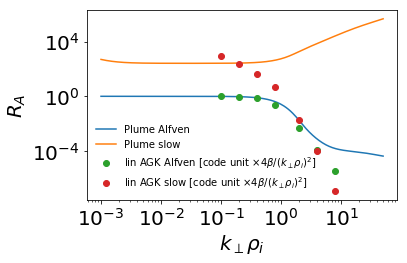

In [22]:
plt.plot(kperp_alfven, ra_alfven, label=r'Plume Alfven')
plt.plot(kperp_slow, ra_slow, label=r'Plume slow')
plt.xscale('log')
plt.yscale('log')

plt.plot(kperps_alfven, np.array(ras_alfven) / np.array(kperps_alfven)**2 * 400, 'o', label=r'lin AGK Alfven [code unit $\times4\beta /(k_\perp \rho_i)^2$]')
plt.plot(kperps_slow, np.array(ras_slow) / np.array(kperps_slow)**2 * 400, 'o', label=r'lin AGK slow [code unit $\times4\beta /(k_\perp \rho_i)^2$]')

plt.ylabel(r'$R_A$')
plt.xlabel(r'$k_\perp\rho_i$')
plt.legend(loc='best', fontsize=10, frameon=False)
plt.tight_layout()
# plt.savefig('../figures/lin_agk_plume_ra.png')

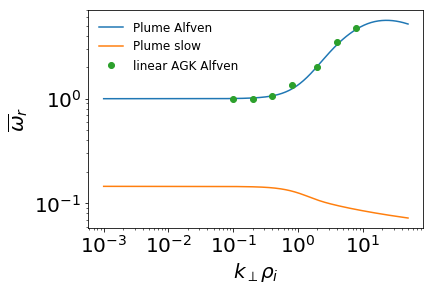

In [18]:
plt.plot(kperp_alfven, wr_alfven / beta, label=r'Plume Alfven')
plt.plot(kperp_slow, wr_slow / beta, label=r'Plume slow')
plt.plot(kperps_alfven, [1.0, 1.0, 1.06, 1.35, 2, 3.5, 4.7], 'o', label=r'linear AGK Alfven')
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$\overline{\omega}_r$')
plt.xlabel(r'$k_\perp\rho_i$')
plt.legend(loc='best', fontsize=12, frameon=False)

## linear run slow mode

In [ ]:
import scipy.interpolate

In [ ]:
f_slow = scipy.interpolate.interp1d(kperp_slow, wr_slow / beta)

In [ ]:
f_slow([.1, 0.2, .4, .8, 2, 4, 8]) * .9